<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [7]:
%matplotlib notebook

import numpy as np
from scipy.optimize import curve_fit
import pylab

import os, fnmatch

In [17]:
# Useful information for calibration goes here
path = '/Users/v/Research/RDA/Calibration/'
data_path = os.path.join(path, 'images')

calib_name = "b_stone_pd_setup_scan1_"

csv_path = os.path.join(path, 'csvpath')
csv_name = "direct_beam_scan1.csv"
db_pixel = [253, 95]  # direct beam pixel
pix_size = 172.0  # pixel size in microns

images = fnmatch.filter(os.listdir(data_path), '*setup*.raw')
fnames = sorted([os.path.join(data_path, image) for image in images])

In [27]:
def read_TIFF(file):
    print("Reading TIFF file here...")
    try:
        im = open(file, 'rb')
        im.seek(4096)   # skip the first 4096 bytes of header info for TIFF images
        arr = np.fromstring(im.read(), dtype='int32')
        im.close()
        arr.shape = (195, 487)
        #arr = np.fliplr(arr)  #for the way mounted at BL2-1
        print(np.shape(arr))
        print(len(arr))
        return arr
    except:
        print("Error reading file: %s" % file)
        return None


def read_RAW(file):
    #print("Reading RAW file here...")
    try:
        im = open(file, 'rb')
        arr = np.fromstring(im.read(), dtype='int32')
        im.close()
        arr.shape = (195, 487)
        #arr = np.fliplr(arr)  #for the way mounted at BL2-1
        return arr
    except:
        print("Error reading file: %s" % file)
        return None

def csvread(filename):  
    print("Reading CSV file here...")
    csv = open(filename)
    line = csv.readline()
    temp = line.split(',')
    xi = 1
    yi = 4
    i0i = 3
    x = []
    y = []
    i0 = []
    line = csv.readline()
    while line:
        temp = line.split(",")
        x = np.append(x, float(temp[xi]))
        y = np.append(y, float(temp[yi]))       
        i0 = np.append(i0, float(temp[i0i]))
        line = csv.readline()
    csv.close()
    return x, y, i0

def gauss_linbkg(x, m, b, x0, intint, fwhm):
    return m*x + b + intint*(2./fwhm)*np.sqrt(np.log(2.)/np.pi)*np.exp(-4.*np.log(2.)*((x-x0)/fwhm)**2)
    
def Gauss_fit(x, y):
    pguess = [0, 0, np.argmax(y), np.max(y), 5.0]  # linear background (2), pos, intensity, fwhm
    popt, pcov = curve_fit(gauss_linbkg, x, y, p0=pguess)
    return popt
    
def simple_line(x, m, b):
    return m*x + b

def tangent(x, D, c):
    return D * np.tan(x*np.pi/180) + c

<IPython.core.display.Javascript object>


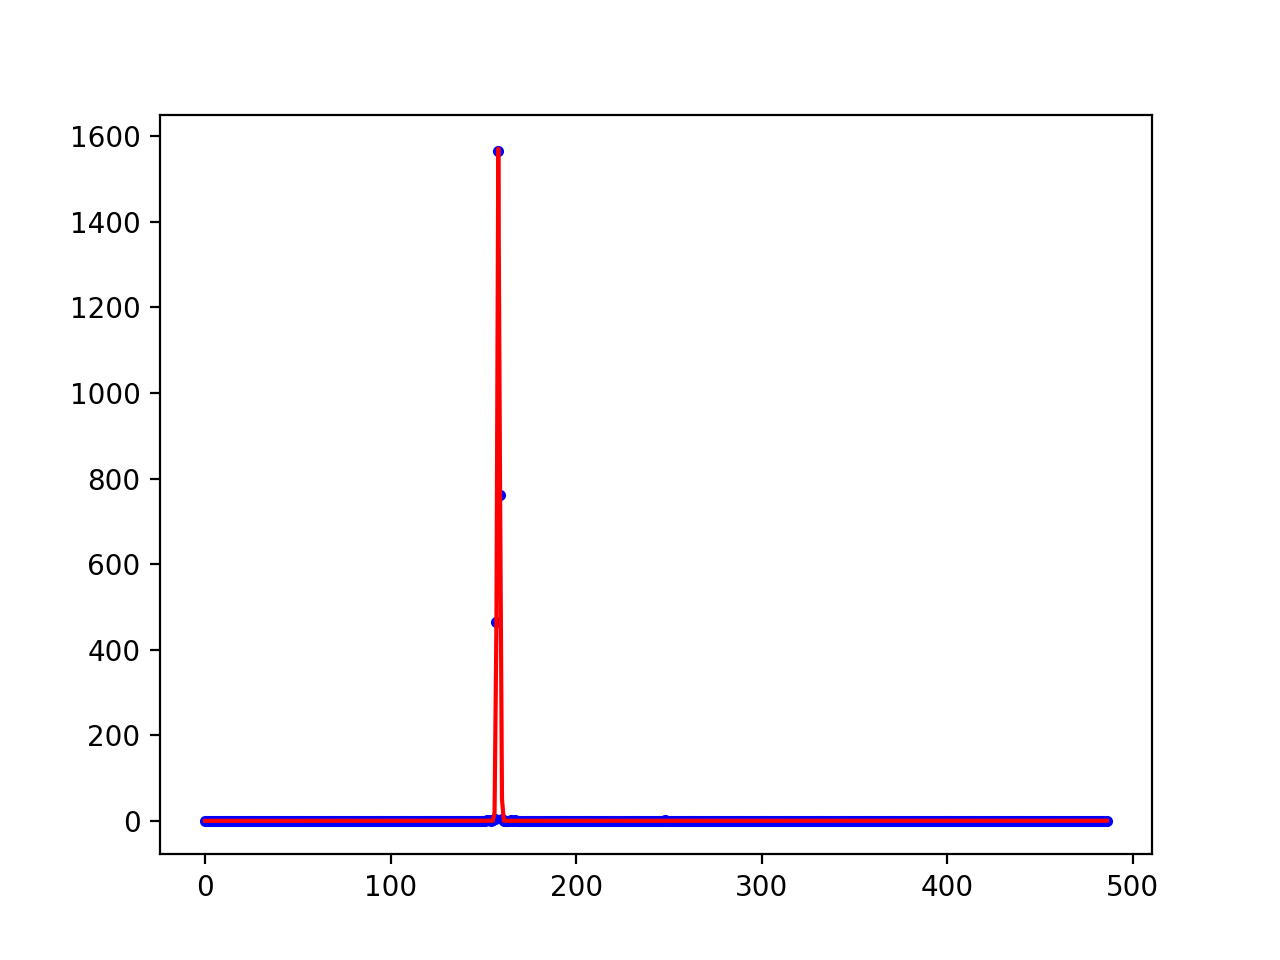

In [12]:
# Read CSV file, get step size and number of points in scan
#x, y, i0 = csvread(csv_path + csv_name)
num_points = 101#len(x)
calib_tth_steps = 0.02#abs(x[1] - x[0])
x = []
y = []
i0 = []

# Read images, take line cut, fit peak for Al2O3 calibration scan
pks = []
pylab.figure()
for i in range(0, num_points):
    #print(i)
    filename = data_path + '/' + calib_name + str(i).zfill(4) + ".raw"
    data = read_RAW(filename)
    x = np.arange(0, np.shape(data)[1])
    y = data[db_pixel[1], :]
    y += data[db_pixel[1] + 1, :]
    y += data[db_pixel[1] - 1, :]
    y += data[db_pixel[1] + 2, :]
    y += data[db_pixel[1] - 2, :]
    popt = Gauss_fit(x, y)
    pylab.cla()
    pylab.plot(x,y, 'b.')
    pylab.plot(x, gauss_linbkg(x, *popt), 'r-')
    pks = np.append(pks, popt[2])

In [13]:
pks

array([301.73310549, 300.46175583, 298.97414319, 297.53069432,
       296.09985361, 294.62433784, 293.22609288, 291.744191  ,
       290.38831359, 288.88175497, 287.53325901, 286.00524808,
       284.58015867, 283.20005019, 281.68472332, 280.30818531,
       278.79203748, 277.46196072, 275.94053564, 274.55283865,
       273.09963386, 271.60547349, 270.25332458, 268.73396014,
       267.37898549, 265.8618172 , 264.48128566, 263.02848399,
       261.59411068, 260.19146351, 258.70252948, 257.32736051,
       255.82767886, 254.47011807, 252.92418348, 251.51599062,
       250.07033677, 248.62865212, 247.22853056, 245.73091559,
       244.31738169, 242.89250216, 241.3699146 , 239.99060998,
       238.5406069 , 237.14201496, 235.64098195, 234.28472662,
       232.80293268, 231.43554693, 229.91609665, 228.529184  ,
       227.09169016, 225.66658124, 224.25118747, 222.71122265,
       221.36520851, 219.86546411, 218.49571996, 217.04880961,
       215.57440436, 214.20018225, 212.712938  , 211.35

In [16]:
calib_tth_steps
x = np.arange(num_points)
x*calib_tth_steps - 1.00

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [24]:
lin_fit

array([-0.01392055,  3.20147473])

Sample to detector distance in pixels = 0.0027006745655847597


<IPython.core.display.Javascript object>


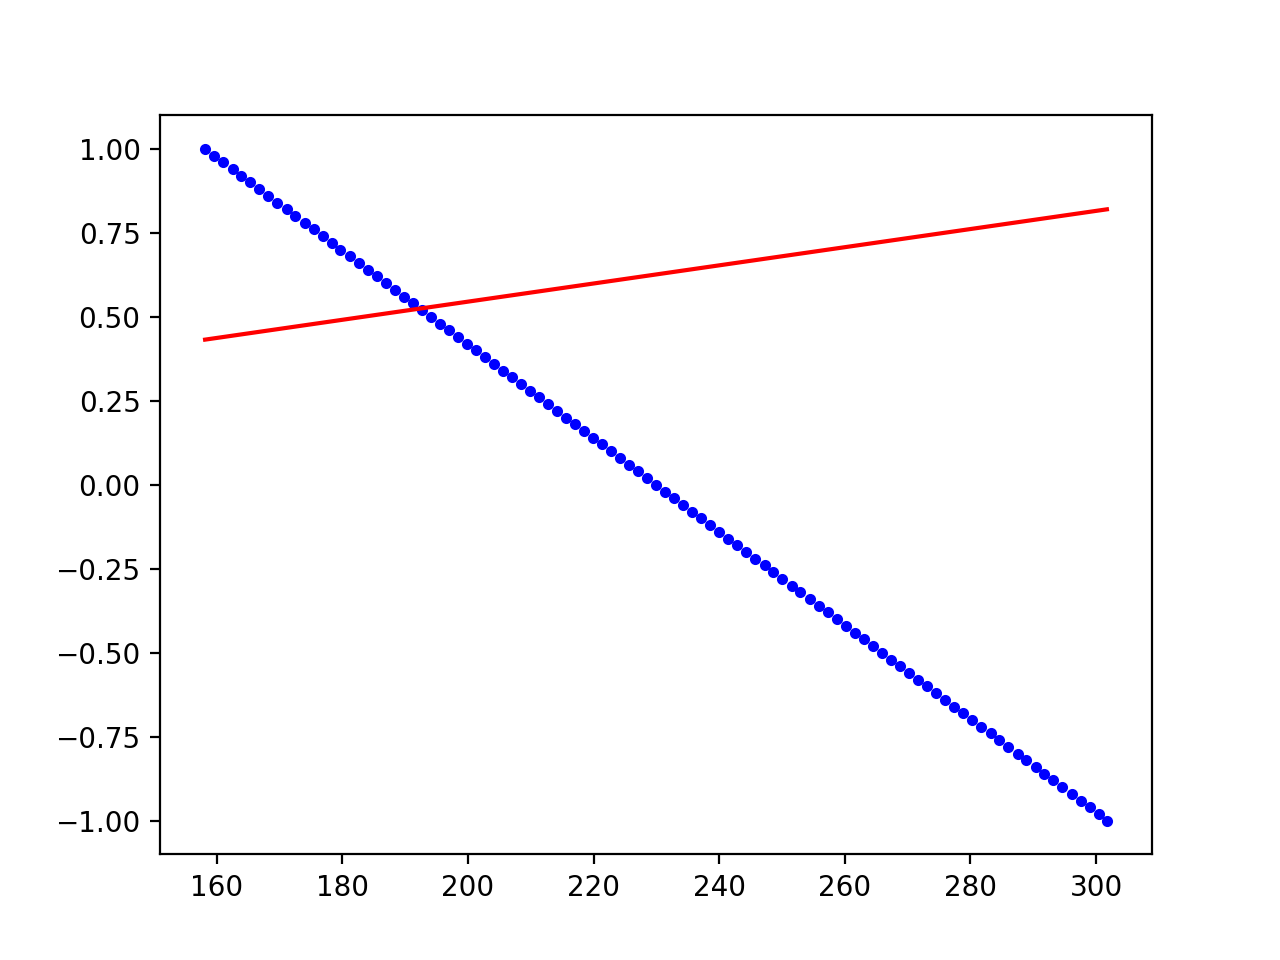

In [28]:
# Fit line to the extracted peak positions and determine the sample to detector distance
x = np.arange(num_points)
lin_fit, pcov = curve_fit(tangent, pks, x*calib_tth_steps - 1.00)
det_R = lin_fit[0]     # sample to detector distance in pixels
#det_R = 1.0/np.tan(abs(lin_fit[0])*np.pi/180.0)     # sample to detector distance in pixels
print("Sample to detector distance in pixels = " + str(det_R))
pylab.figure()
pylab.plot(pks, x*calib_tth_steps-1.0, 'b.')
pylab.plot(pks, lin_fit[0]*pks + lin_fit[1], 'r-')

outname = csv_path + csv_name[:-4] + "_calib.cal"
outfile = open(outname, "w")
outfile.write("direct_beam_x \t %i\n"  % db_pixel[0])
outfile.write("direct_beam_y \t %i\n" % db_pixel[1])
outfile.write("Sample_Detector_distance_pixels \t %15.6G\n" % det_R)
outfile.write("Sample_Detector_distance_mm \t %15.6G" % (det_R * pix_size / 1000.0))
outfile.close()

pylab.show()

Sample to detector distance in pixels = 4115.912487600466


<IPython.core.display.Javascript object>


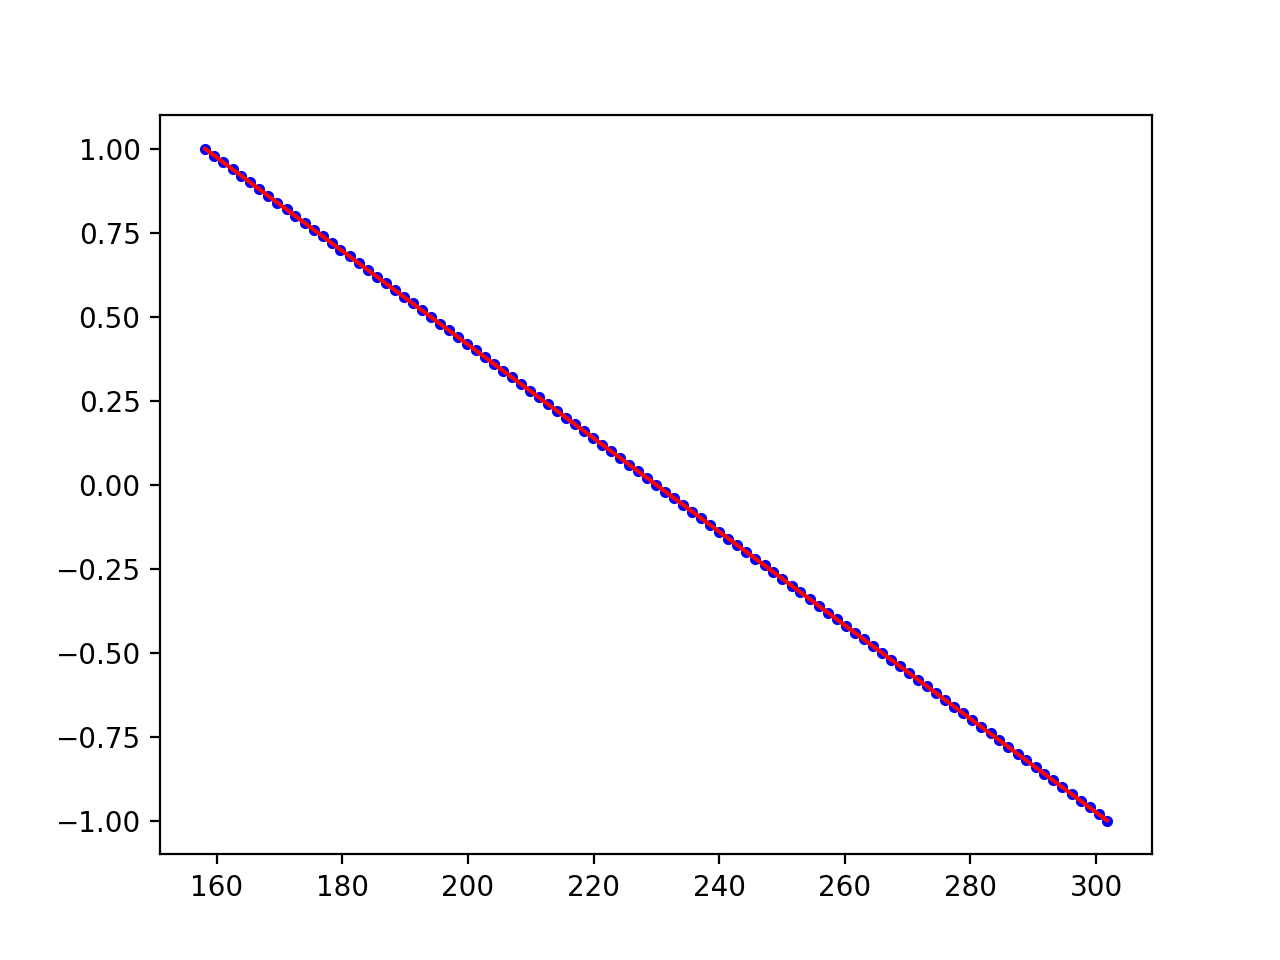

In [22]:
# Fit line to the extracted peak positions and determine the sample to detector distance
x = np.arange(num_points)
lin_fit, pcov = curve_fit(simple_line, pks, x*calib_tth_steps - 1.00)
det_R = 1.0/np.tan(abs(lin_fit[0])*np.pi/180.0)     # sample to detector distance in pixels
print("Sample to detector distance in pixels = " + str(det_R))
pylab.figure()
pylab.plot(pks, x*calib_tth_steps-1.0, 'b.')
pylab.plot(pks, lin_fit[0]*pks + lin_fit[1], 'r-')

outname = csv_path + csv_name[:-4] + "_calib.cal"
outfile = open(outname, "w")
outfile.write("direct_beam_x \t %i\n"  % db_pixel[0])
outfile.write("direct_beam_y \t %i\n" % db_pixel[1])
outfile.write("Sample_Detector_distance_pixels \t %15.6G\n" % det_R)
outfile.write("Sample_Detector_distance_mm \t %15.6G" % (det_R * pix_size / 1000.0))
outfile.close()

pylab.show()

In [23]:
curve_fit?